In [1]:
!pip install librosa


In [2]:
import os
os.environ['PATH'] += ':/Library/TeX/texbin'


In [3]:
import statsmodels
%load_ext autoreload
%autoreload 2

%run ../include/preamble.py

# load BirdVox-70k dataset

from https://zenodo.org/record/1226427#.YrW0fexByWA

12000

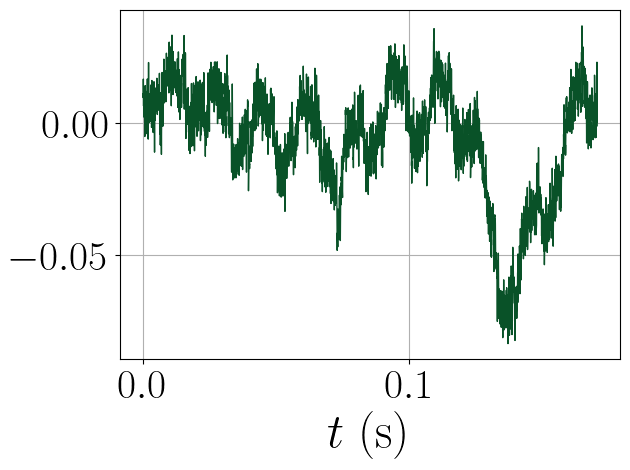

In [4]:
import h5py
import librosa
import librosa.display
import scipy.signal


# load data from the sensor 1
data = h5py.File('../data/BirdVox-70k_unit01.hdf5')

# sampling rate
sr   = 24000

# extract a sample containing a flight call
keys    = data['waveforms'].keys()
keys    = list(filter(lambda key: key.endswith('1'), keys))
key     = keys[1178]
x       = data['waveforms'][key][()]
time_t  = librosa.samples_to_time(range(len(x)), sr=sr)

# filter the signal to remove not relevant frequencies
b, a = scipy.signal.butter(N=15, Wn=(5000, 8000), btype='bandpass', fs=sr)
y    = scipy.signal.lfilter(b, a, x)

# crop the signal 
N       = 4096
# nsignal = y[:N] # FIXME 
nsignal = x[:N] # FIXME 
ntime_t = time_t[:N]

# display the signal
ntime_t = display_signal(nsignal,ntime_t)

len(x)

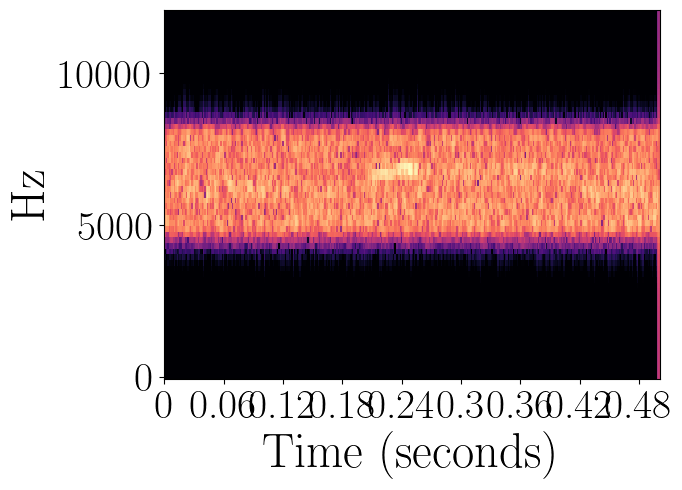

In [7]:
kwargs = dict(hop_length=32, win_length=128, n_fft=128)
S      = librosa.stft(y, **kwargs)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(S)), sr=24000,
    y_axis='hz', x_axis='s', **kwargs)

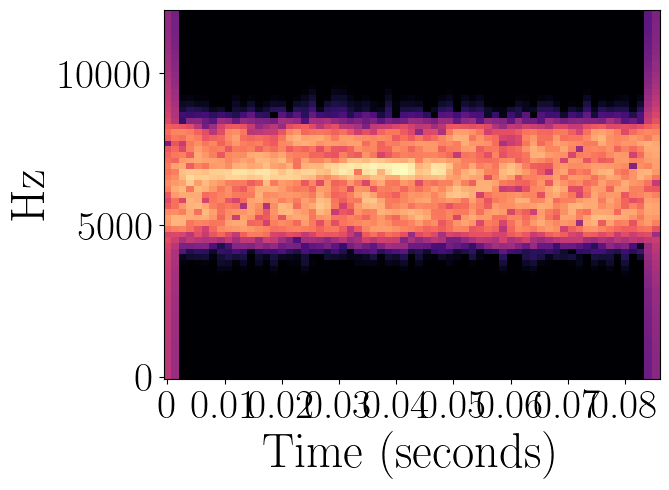

In [8]:
L      = 1024
z      = y[6000-L:6000+L]
T      = librosa.stft(z, **kwargs)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(T)), sr=24000,
    y_axis='hz', x_axis='s', **kwargs)

# Kravchuk spectrogram

Compute the Kravchuk transform
$$
T\boldsymbol{y}(\vartheta, \varphi) =   \sum_{n = 0}^N \sqrt{\binom{N}{n}} \left( \cos \frac{\vartheta}{2} \right)^{n} \left( \sin \frac{\vartheta}{2} \right)^{N - n} \mathrm{e}^{ \mathrm{i} n \varphi } (\textbf{Q}\boldsymbol{y})[n],
$$
with $(\vartheta,\phi) \in [0,\pi]\times [0, 2\pi]$ the spherical coordinates and
$$
(\textbf{Q}\boldsymbol{y})[n] = \langle \boldsymbol{y}, \boldsymbol{q}_n \rangle= \sum_{\ell = 0}^N \overline{\boldsymbol{y}[\ell]} q_n(\ell;N) \quad
$$
the coefficients of $\boldsymbol{y}$ in the orthonormal basis of Kravchuk functions $\lbrace \boldsymbol{q}_n, n = 0, 1, \ldots, N \rbrace$.

In [ ]:
N = 1024
nsignal = nsignal[:N] # 截取前多少个采样点只是为了测试可以运行而已，结果表明确实是计算复杂度很高，懒得等了

# compute the transform
Ks     = the_transform(nsignal)

# find the zeros
zt, zp = the_zeros(Ks,N)
print("zt (zeros of time-domain signal):", zt)
print("zp (zeros of transform domain):", zp)


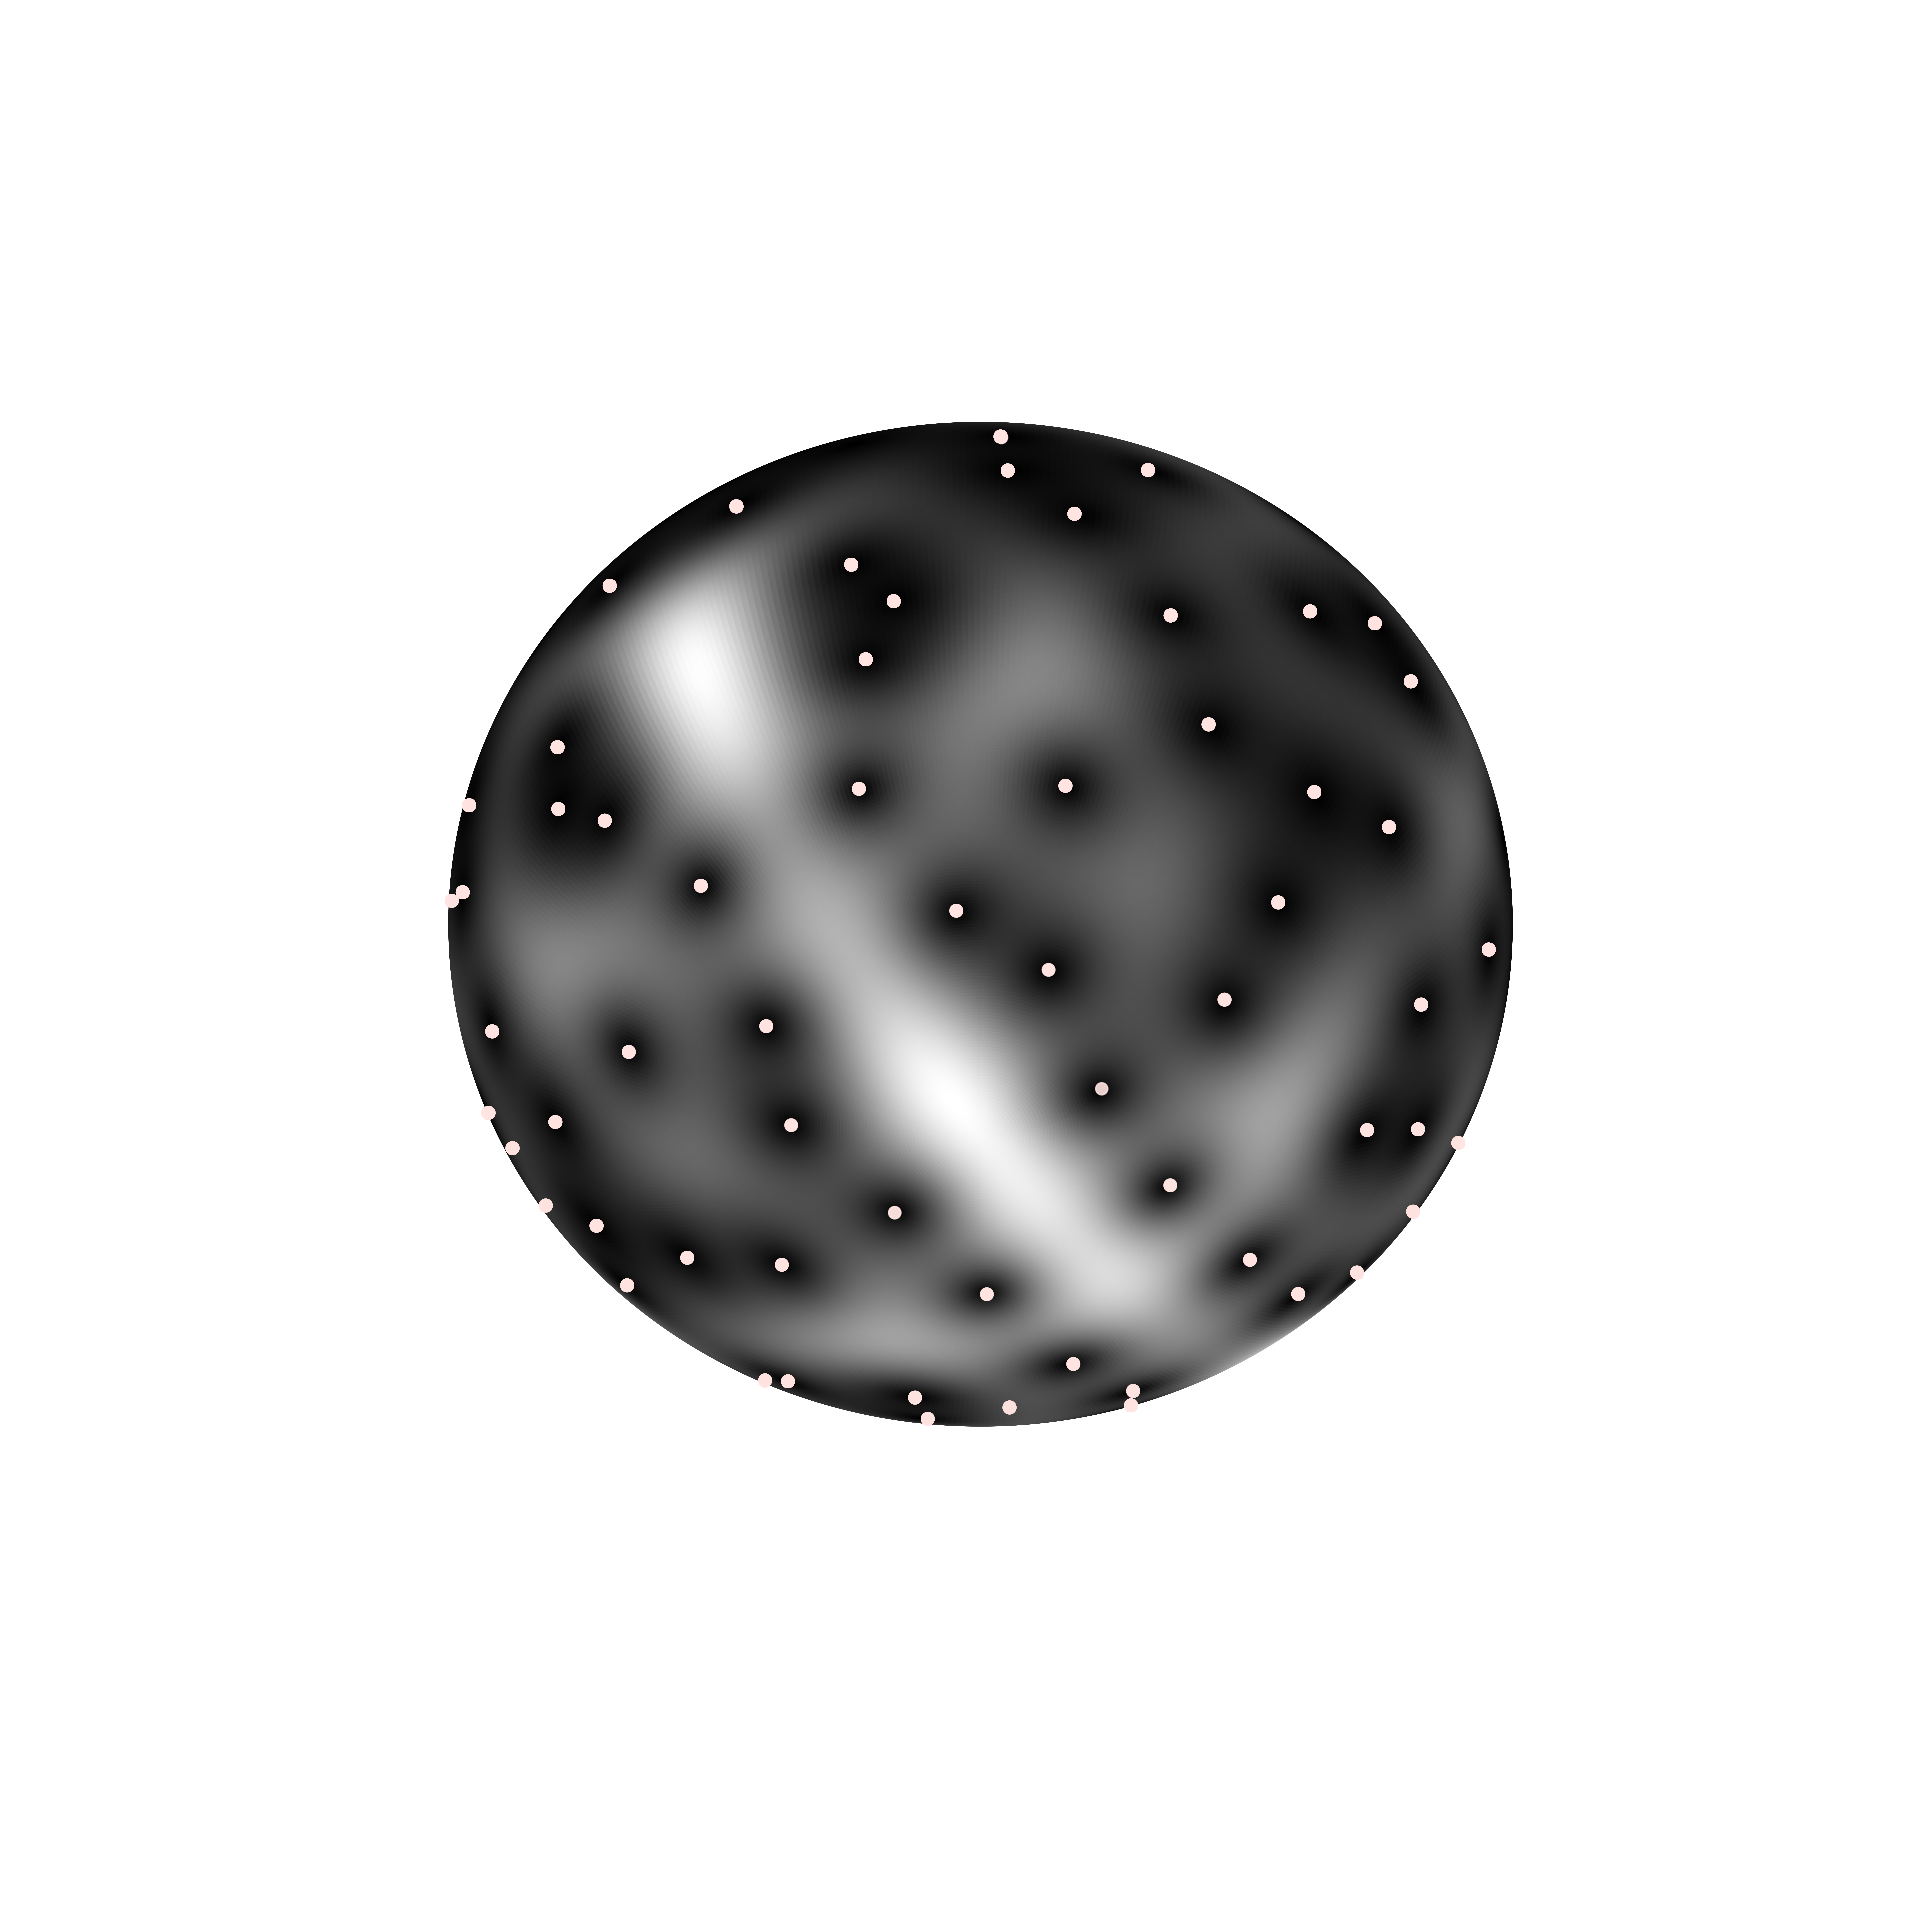

In [13]:
# display the Kravchuk spectrogram and its zeros on the sphere
spherical_display(Ks,zt,zp)

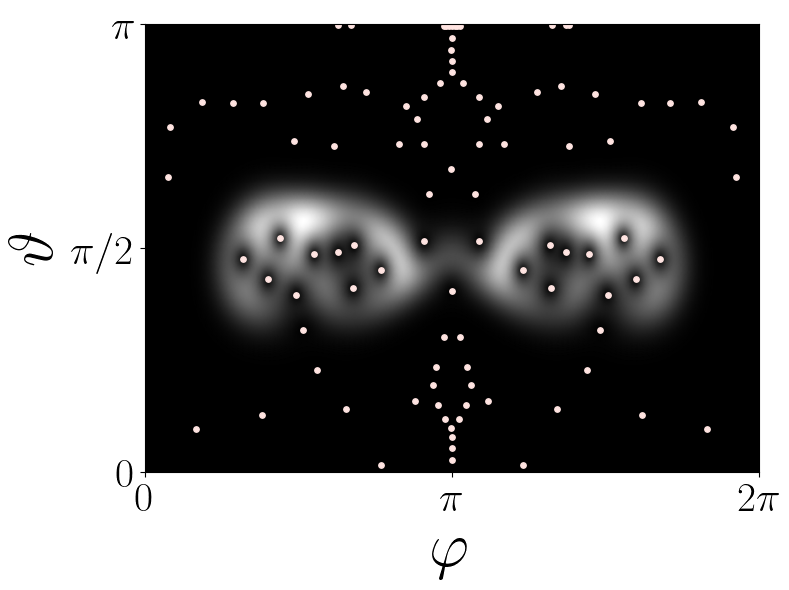

In [20]:
# unfolded representation
planar_display(Ks,zt,zp)